In this notebook we plot TFIM 3 qubit results under depolarizing channel (specific configuration)
and see how many CNOTS the circuits found have

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utilities.circuit_basics import Evaluator

%load_ext autoreload
%autoreload 2

axinticks=[]
plt.rcParams.update({'font.size': 45})


ground = np.genfromtxt('plot/TFIM3_v2.csv',delimiter=',')
js,ans = ground[:,0], ground[:,1]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
from cirq.contrib.svg import SVGCircuit


In [185]:
energies = []
noise = []
cnots = []
circs=[]


for p in [0, 10**-6, 10**-5, 10**-4]:
    if p==0:
        evaluator = Evaluator(loading=True, 
                      args={"n_qubits":3, "J":js[1]})
        energies.append(evaluator.raw_history[len(list(evaluator.raw_history.keys()))-1][-1])
        noise.append(0)
        cnots.append(evaluator.number_cnots_best())
    else:

        evaluator = Evaluator(loading=True, 
                              args={"n_qubits":3, "J":js[1],
                                    "noise_model":{"channel":"depolarizing","channel_params":[p]}})
        energies.append(evaluator.raw_history[len(list(evaluator.raw_history.keys()))-1][-1])
        noise.append(p)
        cnots.append(evaluator.number_cnots_best())
    print("noise: {}".format(p))
    print(circs.append(evaluator.evolution[evaluator.get_best_iteration()[0]][0]))
    print(circs[-1])
    print("\n\n")


noise: 0
None
(0, 0): ───Rx(0.888π)──────────────────────────────────────────────────────────────────────@───Rx(-0.285π)────────────────────@───@───Rx(-0.208π)───Rz(0.152π)───@───────X───Rz(1.06π)───X───────X───Rz(0.081π)────Rx(-0.656π)───X───@───X───Rz(0.526π)───@───X───Rz(0.359π)───Rx(0.655π)───X───Rx(-0.36π)───@───@──────────────────────────────────────────X───@───@───Rz(0.254π)───@───X─────────────────@───Rx(-0.741π)─────────────────────────────@───@─────────────Rz(1.03π)─────Rx(0.693π)────Rz(0.401π)────@──────────────────────────────────────X───@────────────Rz(-0.512π)───Rx(0.258π)───Rz(0.848π)───X───X───Rz(-0.117π)───Rx(-0.507π)───X───@───X───
                                                                                           │                                  │   │                              │       │               │       │                               │   │   │                │   │                             │                │   │                                    

/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


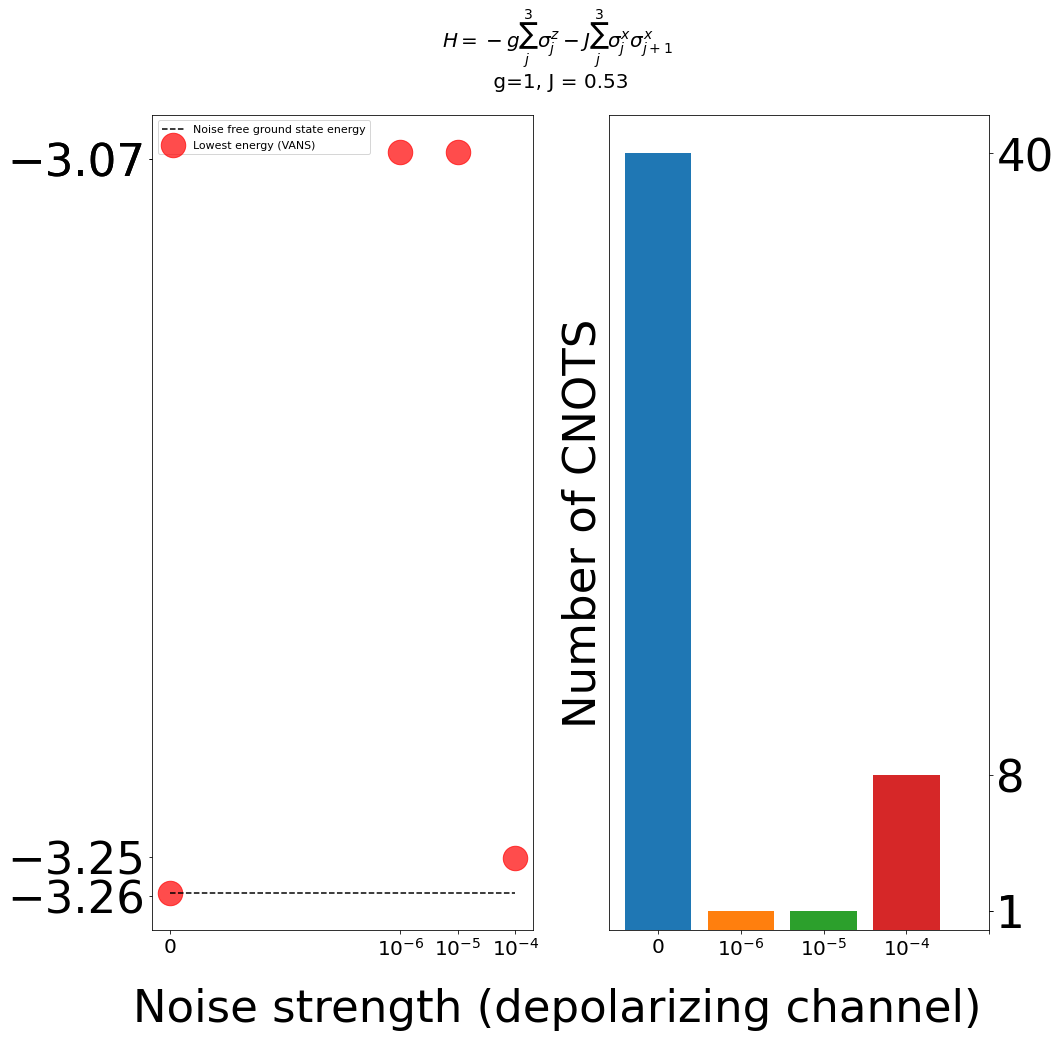

In [200]:
plt.figure(figsize=(15,15))

noisyx = [-10] + list(np.log10(noise[1:]))
plt.suptitle(r'$H = -g \sum^{3}_j \sigma_j^{z} - J \sum^{3}_j \sigma_{j}^{x} \sigma_{j+1}^{x}$'+"\n g=1, J = {}".format(np.round(js[1],2)), size=20)
ax1 = plt.subplot2grid((1,2),(0,0))
ax2 = plt.subplot2grid((1,2,),(0,1))
ax1.plot(noisyx, ans[1]*np.ones(len(noise)), '--',color="black", label="Noise free ground state energy" )

ax1.scatter(noisyx, energies, s=600, color="red",alpha=0.7, label="Lowest energy (VANS)")
for v,b in enumerate(cnots):
    ax2.bar(v,b)
ax2.set_xticks(np.arange(0, len(noise)+.5,1))
labs = [0]
for p in [r"$10^{"+str(int(k))+"}$" for k in np.log10(noise)[1:]]:
    labs.append(p)
ax2.set_xticklabels(labs, size=20)
ax2.set_yticks(cnots)

ax1.set_xticks(noisyx)
ax1.set_xticklabels(labs, size=20)
ax1.set_yticks(np.round(energies,2))

#ax2.set_yticklabels(str(cnots),size=20)
ax2.set_ylabel("Number of CNOTS")
#ax1.set_ylabel("Energy")

#ax2.yaxis.set_label_position("right")
leg = ax1.legend()
leg.get_frame().set_linewidth(300)
leg.get_frame().set_edgecolor('black')
ax1.legend(prop={"size":11})
ax2.yaxis.tick_right()
#plt.xlabel("Depolarizing constant", ha="center")
plt.gcf().text(0.5,0.04,"Noise strength (depolarizing channel)", ha="center")
plt.savefig("depolarizing_tfim_3qubits.png")

In [164]:
noisyx

array([0., 6., 5., 4.])

/home/cooper-cooper/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 0.04, 'Noise strength (depolarizing channel)')

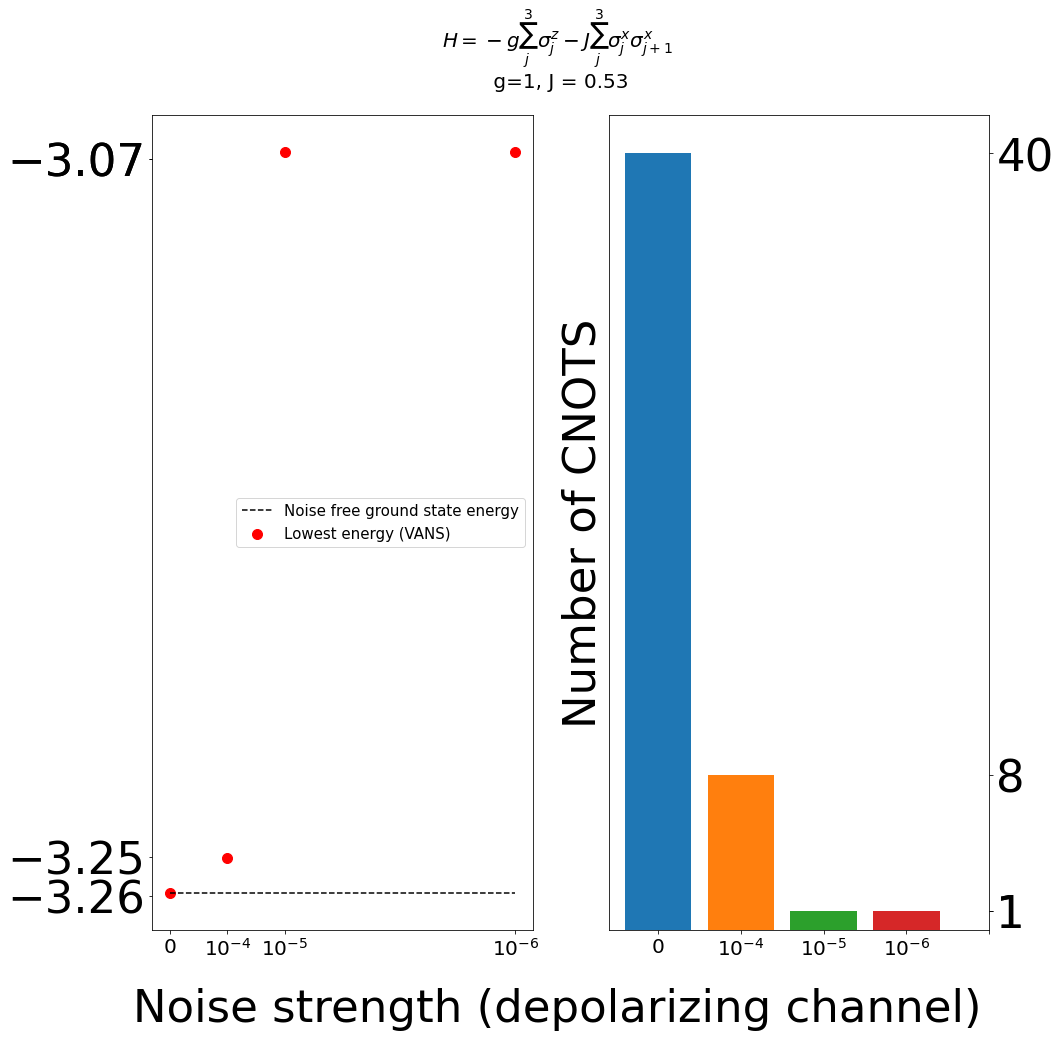

In [149]:
plt.figure(figsize=(15,15))

noisyx = [0] + list(np.log10(noise[1:]))
noisyx = noisyx[::-1]
plt.suptitle(r'$H = -g \sum^{3}_j \sigma_j^{z} - J \sum^{3}_j \sigma_{j}^{x} \sigma_{j+1}^{x}$'+"\n g=1, J = {}".format(np.round(js[1],2)), size=20)
ax1 = plt.subplot2grid((1,2),(0,0))
ax2 = plt.subplot2grid((1,2,),(0,1))
ax1.scatter(noisyx, energies, s=100, color="red", label="Lowest energy (VANS)")
for v,b in enumerate(cnots):
    ax2.bar(v,b)
ax2.set_xticks(np.arange(0, len(noise)+.5,1))
ax1.plot(noisyx, ans[1]*np.ones(len(noise)), '--',color="black", label="Noise free ground state energy" )
labs = [0]
for p in [r"$10^{"+str(int(k))+"}$" for k in np.log10(noise)[1:]]:
    labs.append(p)
ax2.set_xticklabels(labs, size=20)
ax2.set_yticks(cnots)

ax1.set_xticks(noisyx)
ax1.set_xticklabels(labs, size=20)
ax1.set_yticks(np.round(energies,2))

#ax2.set_yticklabels(str(cnots),size=20)
ax2.set_ylabel("Number of CNOTS")
#ax1.set_ylabel("Energy")

#ax2.yaxis.set_label_position("right")
leg = ax1.legend()
leg.get_frame().set_linewidth(300)
leg.get_frame().set_edgecolor('black')
ax1.legend(prop={"size":15})
ax2.yaxis.tick_right()
#plt.xlabel("Depolarizing constant", ha="center")
plt.gcf().text(0.5,0.04,"Noise strength (depolarizing channel)", ha="center")
#rcParams["legend.loc"] = "bottom left"
#ax1.legend(prop={"size":10,"loc":"bottom-left"})

In [53]:
str(cnots)

'[40, 8, 1, 1]'